In [107]:
import pandas as pd

In [108]:
df = pd.read_csv('../data/01_raw/iowa_dataset.csv')

In [109]:
df.head()

,invoice_line_no,date,store,name,address,city,zipcode,county,category,category_name,...,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,sale_bottles,sale_dollars,sale_liters,sale_gallons,store_location,county_number
0,INV-50346800002,2022-08-16,5359,FAREWAY STORES #168/ PEOSTA,8400 NICC DRIVE,PEOSTA,52068.0,DUBUQUE,1062400.0,SPICED RUM,...,12,750,6.00,9.00,12,108.00,9.00,2.37,NaN,NaN
1,INV-50288400002,2022-08-12,2524,HY-VEE FOOD STORE / DUBUQUE,3500 DODGE ST,DUBUQUE,52001.0,DUBUQUE,1012200.0,SCOTCH WHISKIES,...,12,1000,28.24,42.36,6,254.16,6.00,1.58,NaN,NaN
2,INV-50389200010,2022-08-17,3705,LIQUOR LOCKER,507 1ST AVE #100,ROCK RAPIDS,51246.0,LYON,1012100.0,CANADIAN WHISKIES,...,12,1000,6.64,9.96,12,119.52,12.00,3.17,NaN,NaN
3,INV-50258200004,2022-08-11,5107,KUM & GO #4098 / WINDSOR HEIGHTS,7229 UNIVERSITY AVE,WINDSOR HEIGHTS,50311.0,POLK,1012100.0,CANADIAN WHISKIES,...,8,50,8.50,12.75,1,12.75,0.05,0.01,NaN,NaN
4,INV-50378700007,2022-08-16,5203,KIMMES COON RAPIDS COUNTRY STORE #12,"516, HIGHWAY 141",COON RAPIDS,50058.0,CARROLL,1701100.0,TEMPORARY & SPECIALTY PACKAGES,...,12,750,17.49,26.24,12,314.88,9.00,2.37,"{'type': 'Point', 'coordinates': [-94.678386, ...",NaN


In [110]:
data = df[['date', 'sale_dollars']]

In [111]:
data.dtypes


date             object
sale_dollars    float64
dtype: object

In [112]:
data.sample(5)

,date,sale_dollars
5986196,2021-11-16,144.00
4125036,2021-01-19,116.64
1881379,2020-11-16,119.28
6736873,2022-05-27,171.00
5375978,2021-06-10,171.00


In [113]:
data.dropna()

,date,sale_dollars
0,2022-08-16,108.00
1,2022-08-12,254.16
2,2022-08-17,119.52
3,2022-08-11,12.75
4,2022-08-16,314.88
...,...,...
7801637,2020-01-30,6.16
7801638,2020-01-31,233.52
7801639,2020-01-31,119.28
7801640,2020-01-29,2281.20


In [114]:
# Converting "date" column to "datetime" type using "pandas" library:
df2 = data.copy()

df2['date'] = pd.to_datetime(df2['date'], format='%Y-%m-%d', errors='coerce')

In [115]:
df2.dtypes

date            datetime64[ns]
sale_dollars           float64
dtype: object

In [116]:
df2.set_index('date', inplace=True)

In [117]:
df2.sample(5)

,sale_dollars
date,
2021-04-05,45.0
2022-08-10,3059.4
2020-08-25,58.5
2021-04-20,25.0
2020-02-21,324.0


In [118]:
df2.describe()

,sale_dollars
count,7.801642e+06
mean,1.606799e+02
std,5.701766e+02
min,-9.720000e+03
25%,4.200000e+01
50%,8.700000e+01
75%,1.630800e+02
max,2.509320e+05


In [119]:
df_weekly = pd.DataFrame(df2)
df_monthly = pd.DataFrame(df2)

In [120]:
monthly_sales = df_weekly.resample('M').mean()

In [121]:
# Plotting data
import matplotlib.pyplot as plt

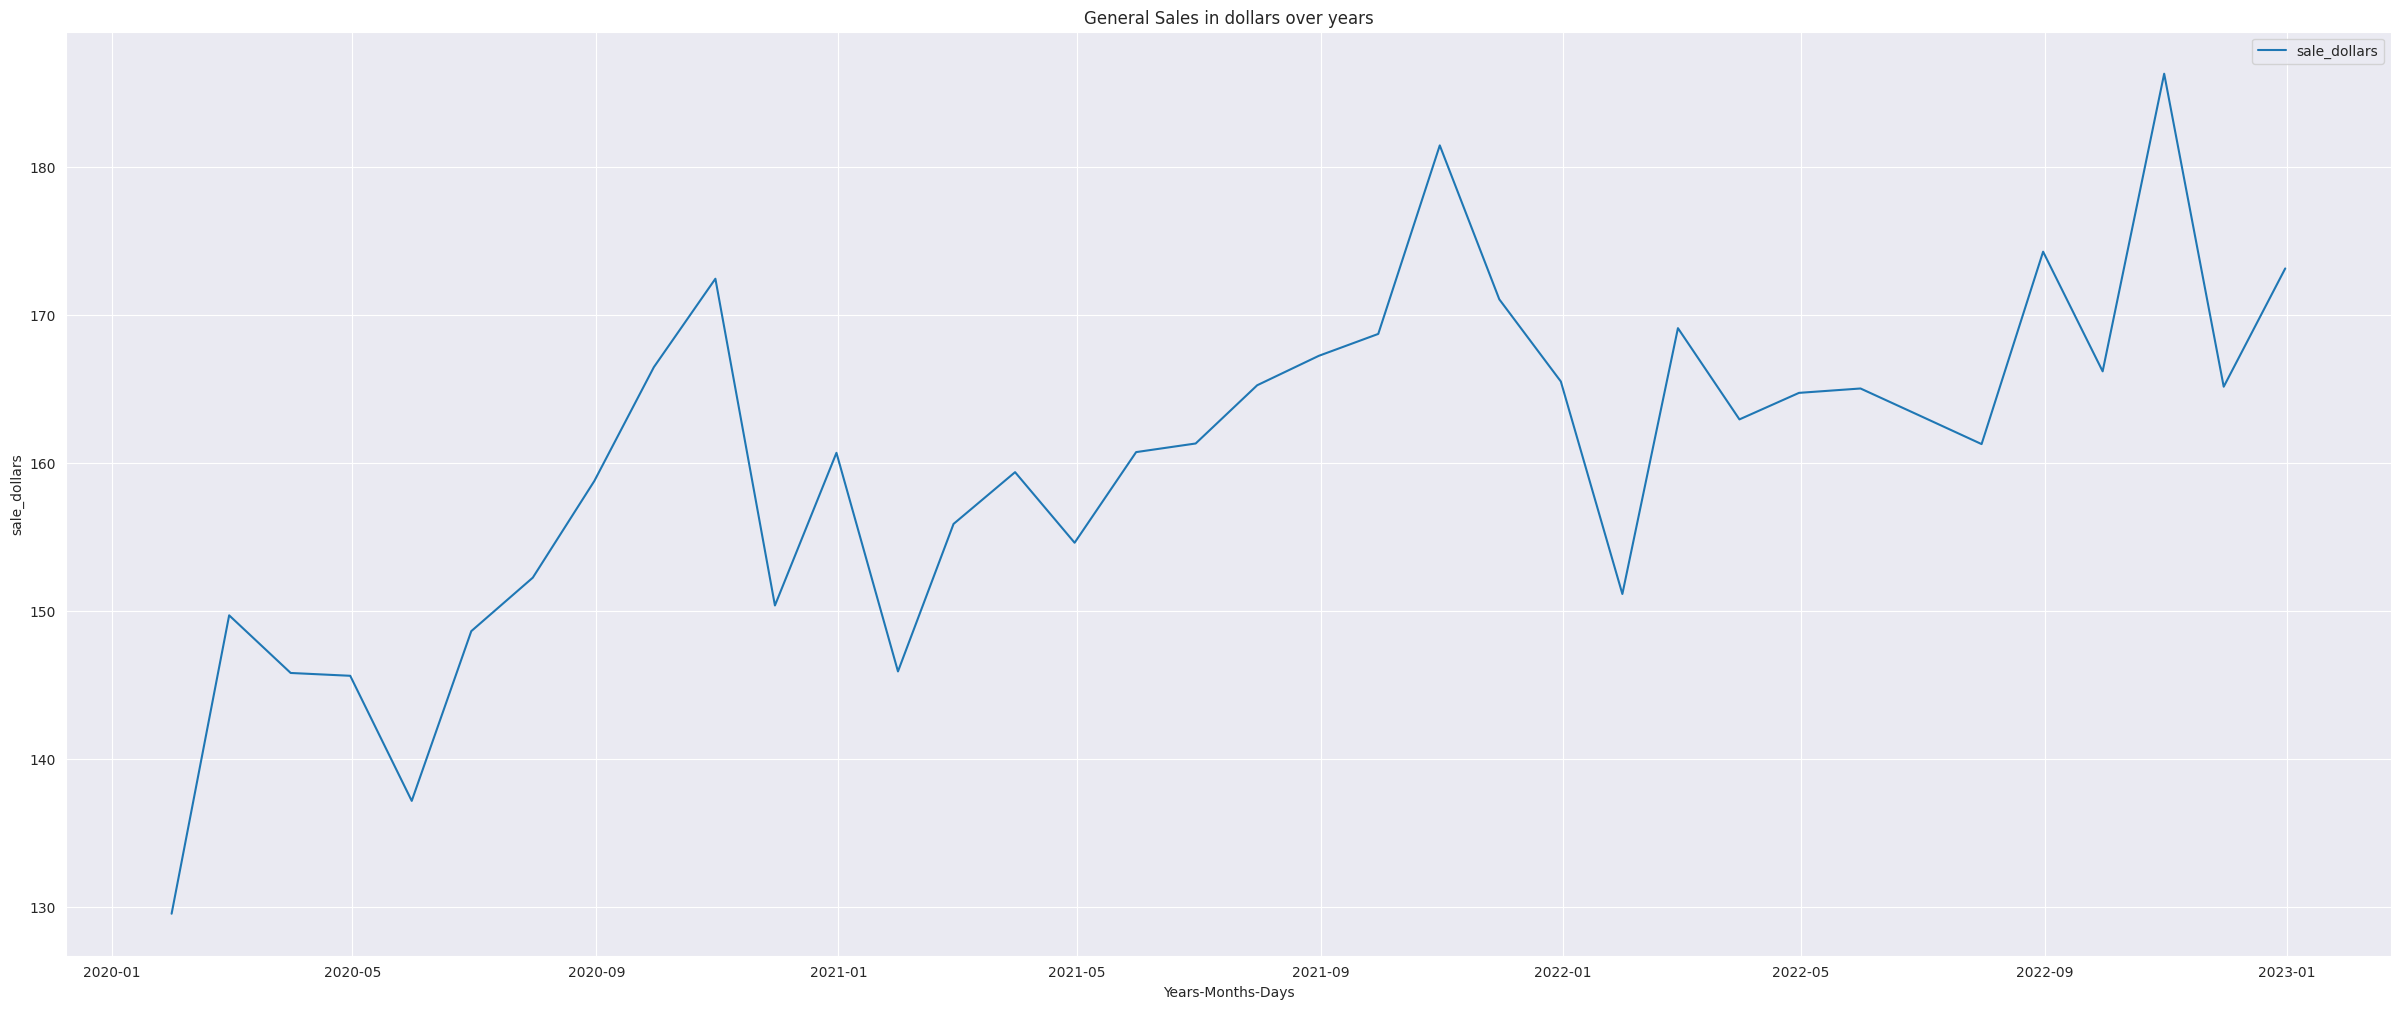

In [122]:
plt.figure(figsize= (30,12))
plt.plot(monthly_sales['sale_dollars'], label = "sale_dollars")
plt.legend()
plt.title('General Sales in dollars over years')
plt.xlabel("Years-Months-Days")
plt.ylabel("sale_dollars")
plt.show();

In [123]:
weekly_sales = df_monthly.resample('W').mean()

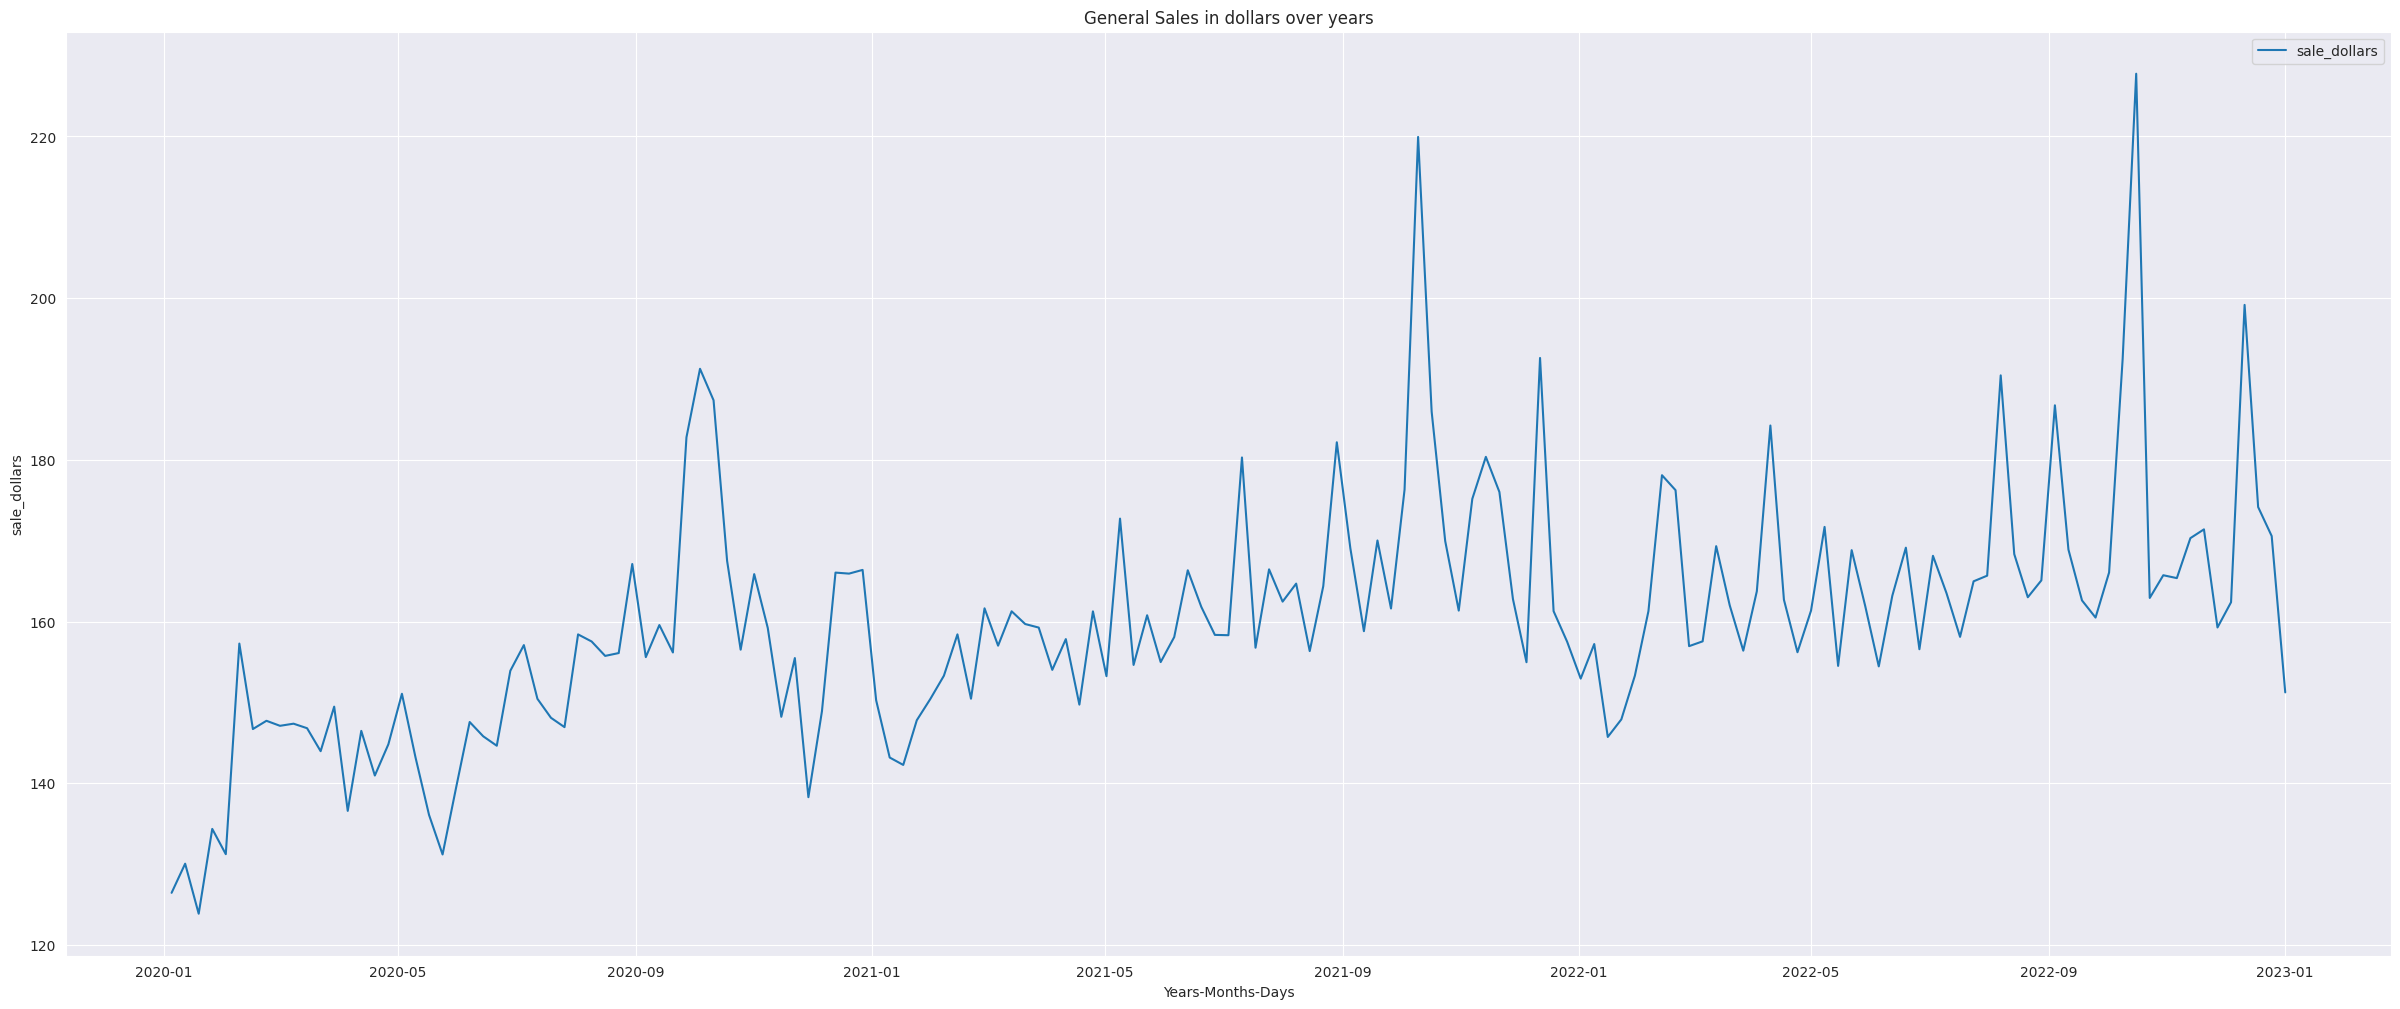

In [124]:
plt.figure(figsize= (30,12))
plt.plot(weekly_sales['sale_dollars'], label = "sale_dollars")
plt.legend()
plt.title('General Sales in dollars over years')
plt.xlabel("Years-Months-Days")
plt.ylabel("sale_dollars")
plt.show();

In [125]:
#ARIMA
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [147]:
arima_model = ARIMA(weekly_sales['sale_dollars'], order=(12,0,3))

In [148]:
best_model = auto_arima(weekly_sales['sale_dollars'], seasonal=False, m=1,
                        start_p=0, start_q=0, max_p=5, max_q=5, d=1,
                        trace=True, error_action='ignore', suppress_warnings=True)

print(best_model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1261.535, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1251.178, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1226.676, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1259.556, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1216.892, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1218.565, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1217.389, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1242.910, Time=0.06 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1220.305, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1217.709, Time=0.04 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 1.102 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  157
M

In [149]:
#arima_model_fit = best_model.fit(weekly_sales['sale_dollars'])
arima_model_fit = arima_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [150]:
arima_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           sale_dollars   No. Observations:                  157
Model:                ARIMA(12, 0, 3)   Log Likelihood                -599.276
Date:                Thu, 21 Dec 2023   AIC                           1232.552
Time:                        00:06:41   BIC                           1284.508
Sample:                    01-05-2020   HQIC                          1253.653
                         - 01-01-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        159.7333      6.787     23.534      0.000     146.431     173.036
ar.L1          1.0685      1.943      0.550      0.582      -2.739       4.876
ar.L2         -1.0470      0.566     -1.851      0.064      -2.156       0.062
ar.L3          1.0283      1.581      0.650      0.516      -2.071       4.128
ar.L4         -0.1527      0.809     -0.189      0.850      -1.739       1.434
ar.L5         -0.0489      0.366     -0.134      0.894      -0.766       0.668
ar.L6          0.2205      0.284      0.775      0.438      -0.337       0.778
ar.L7         -0.2419      0.532     -0.455      0.649      -1.285       0.801
ar.L8          0.2009      0.173      1.159      0.246      -0.139       0.540
ar.L9         -0.0508      0.382     -0.133      0.894      -0.800       0.698
ar.L10         0.0601      0.192      0.314      0.754      -0.316       0.436
ar.L11        -0.0541      0.297     -0.182      0.855      -0.636       0.528
ar.L12        -0.0463      0.096     -0.481      0.630      -0.235       0.142
ma.L1         -0.6074      1.978     -0.307      0.759      -4.484       3.269
ma.L2          0.8644      0.341      2.536      0.011       0.196       1.532
ma.L3         -0.7576      1.936     -0.391      0.696      -4.552       3.037
sigma2       117.3735     12.728      9.222      0.000      92.428     142.319
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                78.21
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               1.63   Skew:                             0.87
Prob(H) (two-sided):                  0.08   Kurtosis:                         5.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [151]:
# check the shape of the model
weekly_sales.shape

(157, 2)

In [152]:
# forecast the model:
weekly_sales['forecast'] = arima_model_fit.predict(start = 130, end = 156, dynamic = True)

<Axes: xlabel='date'>

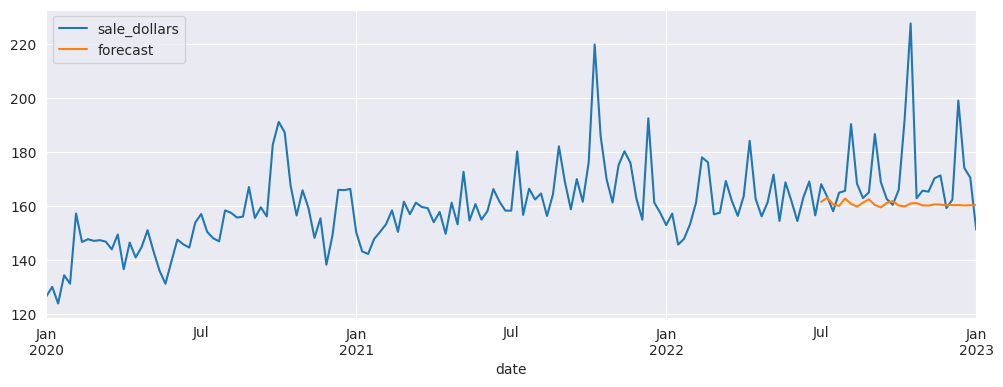

In [153]:
# compare the foracasted value by plotting actual values together:
weekly_sales[['sale_dollars', 'forecast']].plot(figsize=(12,4))